In [1]:
from google.colab import files
uploaded = files.upload()

Saving NIFTY50_all.csv to NIFTY50_all.csv
Saving NTPC.csv to NTPC.csv
Saving ONGC.csv to ONGC.csv
Saving POWERGRID.csv to POWERGRID.csv
Saving RELIANCE.csv to RELIANCE.csv
Saving SBIN.csv to SBIN.csv
Saving SHREECEM.csv to SHREECEM.csv
Saving stock_metadata.csv to stock_metadata.csv
Saving SUNPHARMA.csv to SUNPHARMA.csv
Saving TATAMOTORS.csv to TATAMOTORS.csv
Saving TATASTEEL.csv to TATASTEEL.csv
Saving TCS.csv to TCS.csv
Saving TECHM.csv to TECHM.csv
Saving TITAN.csv to TITAN.csv
Saving ULTRACEMCO.csv to ULTRACEMCO.csv
Saving UPL.csv to UPL.csv
Saving VEDL.csv to VEDL.csv
Saving WIPRO.csv to WIPRO.csv
Saving ZEEL.csv to ZEEL.csv
Saving ADANIPORTS.csv to ADANIPORTS.csv
Saving ASIANPAINT.csv to ASIANPAINT.csv
Saving AXISBANK.csv to AXISBANK.csv
Saving BAJAJ-AUTO.csv to BAJAJ-AUTO.csv
Saving BAJAJFINSV.csv to BAJAJFINSV.csv
Saving BAJFINANCE.csv to BAJFINANCE.csv
Saving BHARTIARTL.csv to BHARTIARTL.csv
Saving BPCL.csv to BPCL.csv
Saving BRITANNIA.csv to BRITANNIA.csv
Saving CIPLA.csv to 

In [2]:
print(uploaded.keys())

dict_keys(['NIFTY50_all.csv', 'NTPC.csv', 'ONGC.csv', 'POWERGRID.csv', 'RELIANCE.csv', 'SBIN.csv', 'SHREECEM.csv', 'stock_metadata.csv', 'SUNPHARMA.csv', 'TATAMOTORS.csv', 'TATASTEEL.csv', 'TCS.csv', 'TECHM.csv', 'TITAN.csv', 'ULTRACEMCO.csv', 'UPL.csv', 'VEDL.csv', 'WIPRO.csv', 'ZEEL.csv', 'ADANIPORTS.csv', 'ASIANPAINT.csv', 'AXISBANK.csv', 'BAJAJ-AUTO.csv', 'BAJAJFINSV.csv', 'BAJFINANCE.csv', 'BHARTIARTL.csv', 'BPCL.csv', 'BRITANNIA.csv', 'CIPLA.csv', 'COALINDIA.csv', 'DRREDDY.csv', 'EICHERMOT.csv', 'GAIL.csv', 'GRASIM.csv', 'HCLTECH.csv', 'HDFC.csv', 'HDFCBANK.csv', 'HEROMOTOCO.csv', 'HINDALCO.csv', 'HINDUNILVR.csv', 'ICICIBANK.csv', 'INDUSINDBK.csv', 'INFRATEL.csv', 'INFY.csv', 'IOC.csv', 'ITC.csv', 'JSWSTEEL.csv', 'KOTAKBANK.csv', 'LT.csv', 'MARUTI.csv', 'MM.csv', 'NESTLEIND.csv'])


In [3]:
import pandas as pd

dataframes = []

for filename in uploaded.keys():
    df = pd.read_csv(filename)
    dataframes.append(df)

combined_data = pd.concat(dataframes, ignore_index=True)

print(combined_data.info())
print(combined_data.head())

<ipython-input-3-2f73de655589>:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_data = pd.concat(dataframes, ignore_index=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470434 entries, 0 to 470433
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                470384 non-null  object 
 1   Symbol              470434 non-null  object 
 2   Series              470434 non-null  object 
 3   Prev Close          470384 non-null  float64
 4   Open                470384 non-null  float64
 5   High                470384 non-null  float64
 6   Low                 470384 non-null  float64
 7   Last                470384 non-null  float64
 8   Close               470384 non-null  float64
 9   VWAP                470384 non-null  float64
 10  Volume              470384 non-null  float64
 11  Turnover            470384 non-null  float64
 12  Trades              240688 non-null  float64
 13  Deliverable Volume  438230 non-null  float64
 14  %Deliverble         438230 non-null  float64
 15  Company Name        50 non-null   

In [4]:
combined_data.isnull().sum()

Date                      50
Symbol                     0
Series                     0
Prev Close                50
Open                      50
High                      50
Low                       50
Last                      50
Close                     50
VWAP                      50
Volume                    50
Turnover                  50
Trades                229746
Deliverable Volume     32204
%Deliverble            32204
Company Name          470384
Industry              470384
ISIN Code             470384
dtype: int64

In [5]:
missing_values = combined_data.isnull().sum()
print(missing_values)

missing_percentage = (missing_values / len(combined_data)) * 100
print(missing_percentage)

Date                      50
Symbol                     0
Series                     0
Prev Close                50
Open                      50
High                      50
Low                       50
Last                      50
Close                     50
VWAP                      50
Volume                    50
Turnover                  50
Trades                229746
Deliverable Volume     32204
%Deliverble            32204
Company Name          470384
Industry              470384
ISIN Code             470384
dtype: int64
Date                   0.010628
Symbol                 0.000000
Series                 0.000000
Prev Close             0.010628
Open                   0.010628
High                   0.010628
Low                    0.010628
Last                   0.010628
Close                  0.010628
VWAP                   0.010628
Volume                 0.010628
Turnover               0.010628
Trades                48.837031
Deliverable Volume     6.845594
%Deliverble      

In [6]:
combined_data = combined_data.drop(columns=['Company Name', 'Industry', 'ISIN Code'])

In [7]:
combined_data = combined_data.dropna(subset=['Date', 'Symbol', 'Close'])

In [8]:
combined_data['Close'] = combined_data['Close'].fillna(combined_data['Close'].mean())

In [9]:
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

In [10]:
combined_data['Series'] = combined_data['Series'].fillna(combined_data['Series'].mode()[0])

In [11]:
combined_data['Trades'] = combined_data['Trades'].fillna(0)  # Assuming missing trades are 0
combined_data['%Deliverble'] = combined_data['%Deliverble'].fillna(combined_data['%Deliverble'].mean())

In [12]:
print(combined_data.isnull().sum())
print(combined_data.info())
print(combined_data.head())

Date                      0
Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume    32154
%Deliverble               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 470384 entries, 0 to 470433
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                470384 non-null  datetime64[ns]
 1   Symbol              470384 non-null  object        
 2   Series              470384 non-null  object        
 3   Prev Close          470384 non-null  float64       
 4   Open                470384 non-null  float64       
 5   High                470384 non-null  float64       
 6   

In [13]:
combined_data.to_csv('cleaned_data.csv', index=False)

In [14]:
combined_data = combined_data.sort_values(by='Date')

In [15]:
combined_data = combined_data.drop_duplicates()

In [16]:
combined_data.head()

Date     Symbol Series  Prev Close    Open     High      Low  \
347280 2000-01-03       BPCL     EQ      381.20   405.0   407.00   393.05   
268898 2000-01-03      TELCO     EQ      201.60   207.4   217.25   207.40   
287284 2000-01-03      TITAN     EQ      144.95   146.0   156.45   146.00   
85671  2000-01-03  HEROHONDA     EQ     1145.20  1200.0  1236.80  1171.00   
365795 2000-01-03    DRREDDY     EQ     1396.50  1505.0  1508.25  1505.00   

           Last    Close     VWAP    Volume      Turnover  Trades  \
347280   397.75   399.25   399.32    8720.0  3.482029e+11     0.0   
268898   217.00   216.75   214.28  676126.0  1.448775e+13     0.0   
287284   155.00   155.70   154.36   23000.0  3.550370e+11     0.0   
85671   1209.95  1207.60  1209.11   10631.0  1.285401e+12     0.0   
365795  1508.25  1508.25  1508.21   13280.0  2.002904e+12     0.0   

        Deliverable Volume  %Deliverble  
347280                 NaN     0.502997  
268898                 NaN     0.502997  
287284                 NaN     0.502997  
85671                  NaN     0.502997  
365795                 NaN     0.502997

Exploratory Data Analysis (EDA)

Summary Statistics

In [17]:
combined_data.describe()

Date     Prev Close           Open  \
count                         250322  250322.000000  250322.000000   
mean   2011-06-02 21:00:22.866547968    1265.606973    1267.193475   
min              2000-01-03 00:00:00       0.000000       8.500000   
25%              2006-07-10 00:00:00     273.900000     274.500000   
50%              2011-08-22 00:00:00     564.500000     565.000000   
75%              2016-07-13 00:00:00    1240.550000    1241.000000   
max              2021-04-30 00:00:00   32861.950000   33399.950000   
std                              NaN    2586.414315    2590.465375   

                High            Low           Last          Close  \
count  250322.000000  250322.000000  250322.000000  250322.000000   
mean     1286.047435    1246.905068    1265.823356    1265.986787   
min         9.750000       8.500000       9.100000       9.150000   
25%       279.000000     269.150000     274.000000     273.950000   
50%       574.950000     555.000000     565.000000     564.700000   
75%      1260.000000    1220.000000    1240.000000    1240.600000   
max     33480.000000   32468.100000   32849.000000   32861.950000   
std      2625.086970    2551.635420    2586.659301    2587.368387   

               VWAP        Volume      Turnover        Trades  \
count  250322.00000  2.503220e+05  2.503220e+05  2.503220e+05   
mean     1266.57824  3.065993e+06  1.619964e+14  3.188848e+04   
min         9.21000  3.000000e+00  1.047000e+07  0.000000e+00   
25%       274.31250  2.213822e+05  1.628856e+13  0.000000e+00   
50%       565.03000  1.013654e+06  6.863308e+13  1.830500e+03   
75%      1240.95750  3.038388e+06  1.875074e+14  4.551300e+04   
max     32975.24000  4.810589e+08  3.564334e+16  1.643015e+06   
std      2587.90509  7.323097e+06  3.291227e+14  5.827725e+04   

       Deliverable Volume    %Deliverble  
count        2.338690e+05  250322.000000  
mean         1.311402e+06       0.498056  
min          5.000000e+00       0.023600  
25%          1.249850e+05       0.375100  
50%          4.962960e+05       0.502997  
75%          1.444855e+06       0.621700  
max          2.325307e+08       1.000000  
std          2.807571e+06       0.181805

Visualize Stock Prices:

Example:
Plot the closing prices of a specific stock symbol

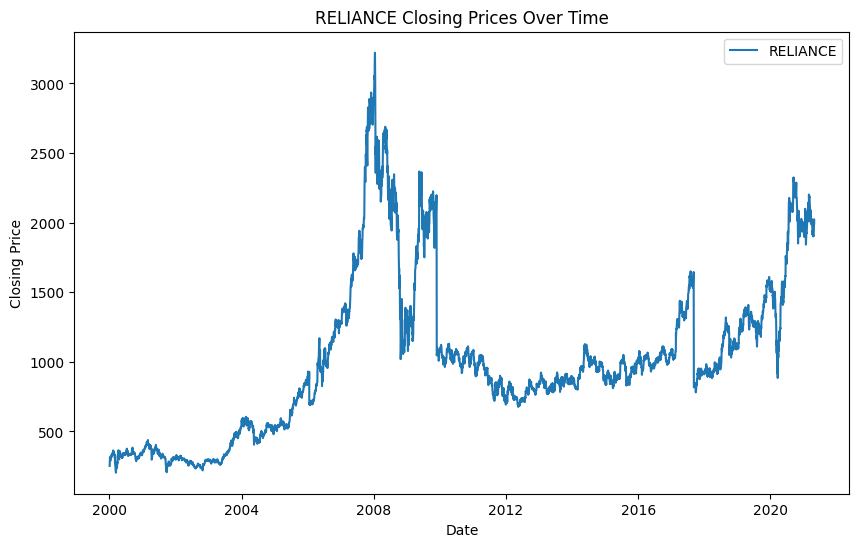

In [18]:
import matplotlib.pyplot as plt

symbol = 'RELIANCE'
stock_data = combined_data[combined_data['Symbol'] == symbol]

plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label=symbol)
plt.title(f"{symbol} Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

**Feature Engineering**

Simple Moving Average (SMA)

In [19]:
combined_data['50_SMA'] = combined_data.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=50).mean())
combined_data['50_SMA'].head()

347280   NaN
268898   NaN
287284   NaN
85671    NaN
365795   NaN
Name: 50_SMA, dtype: float64

2.Volatility (High - Low)

In [20]:
combined_data['Volatility'] = combined_data['High'] - combined_data['Low']
combined_data['Volatility'].head()

347280    13.95
268898     9.85
287284    10.45
85671     65.80
365795     3.25
Name: Volatility, dtype: float64

1. Analyze the Indicators Explaining Volatility and Unpredictability

In [21]:
combined_data['Daily_Range'] = combined_data['High'] - combined_data['Low']
combined_data['Volatility'] = combined_data.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=30).std())
print(combined_data[['Symbol', 'Date', 'Daily_Range', 'Volatility']].head())

           Symbol       Date  Daily_Range  Volatility
347280       BPCL 2000-01-03        13.95         NaN
268898      TELCO 2000-01-03         9.85         NaN
287284      TITAN 2000-01-03        10.45         NaN
85671   HEROHONDA 2000-01-03        65.80         NaN
365795    DRREDDY 2000-01-03         3.25         NaN


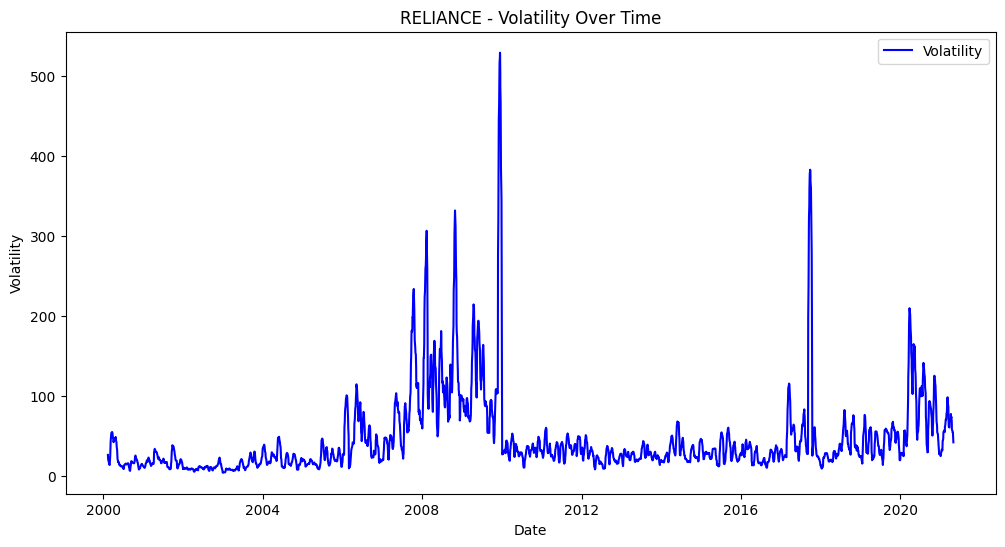

In [22]:
import matplotlib.pyplot as plt

symbol = 'RELIANCE'
stock_data = combined_data[combined_data['Symbol'] == symbol]

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Volatility'], label='Volatility', color='blue')
plt.title(f"{symbol} - Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

In [23]:
correlation = combined_data[['Daily_Range', 'Volatility', 'Volume', 'Turnover']].corr()
print(correlation)

             Daily_Range  Volatility    Volume  Turnover
Daily_Range     1.000000    0.576907 -0.087446  0.088572
Volatility      0.576907    1.000000 -0.068998  0.060691
Volume         -0.087446   -0.068998  1.000000  0.628956
Turnover        0.088572    0.060691  0.628956  1.000000


2. Choose Promising Stocks for the Portfolio

Top Performing Stocks

In [24]:
combined_data['Daily_Return'] = combined_data.groupby('Symbol')['Close'].pct_change()

stock_performance = combined_data.groupby('Symbol').agg({
    'Daily_Return': 'mean',
    'Volatility': 'mean',
    'Volume': 'mean'
}).reset_index()

top_stocks = stock_performance.sort_values(by='Daily_Return', ascending=False).head(10)
print(top_stocks)

        Symbol  Daily_Return  Volatility        Volume
7       BHARTI      0.002172    7.269245  1.670417e+06
60     UTIBANK      0.001971    8.728883  2.891565e+05
6   BAJFINANCE      0.001451  163.528094  1.214236e+06
5   BAJAUTOFIN      0.001449   11.880930  1.893987e+04
47    SHREECEM      0.001441  256.454227  2.484466e+04
14   EICHERMOT      0.001278  316.007978  9.654166e+04
46     SESAGOA      0.001259   53.035194  1.846516e+06
4   BAJAJFINSV      0.001198  127.001997  2.303975e+05
27  INDUSINDBK      0.001128   20.147228  2.331983e+06
54       TELCO      0.001126    8.877478  1.836553e+06


Visualize Stock Performance

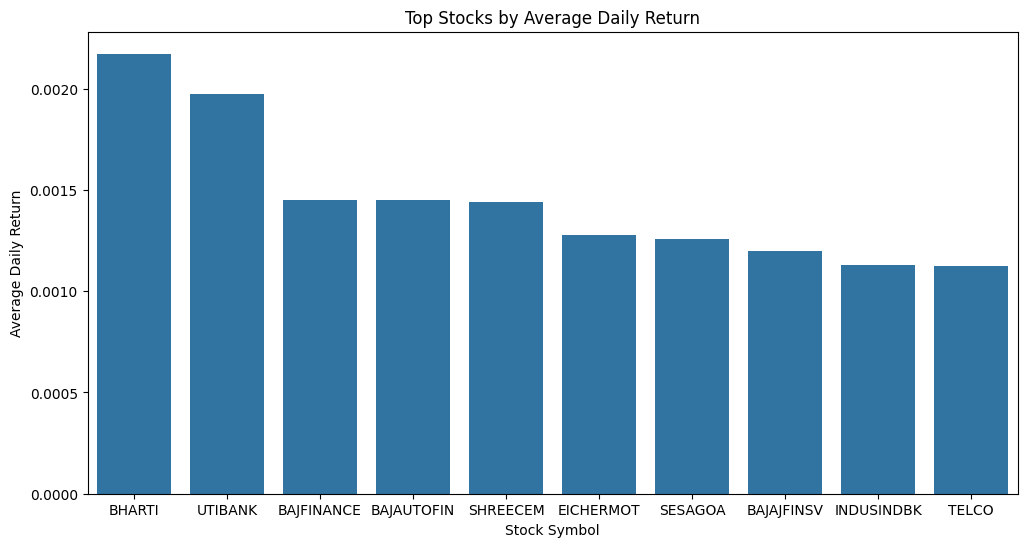

In [25]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Symbol', y='Daily_Return', data=top_stocks)
plt.title("Top Stocks by Average Daily Return")
plt.ylabel("Average Daily Return")
plt.xlabel("Stock Symbol")
plt.show()

3. Build a Dashboard to Analyze Stock Performance

In [26]:
import plotly.express as px

fig = px.line(combined_data, x='Date', y='Close', color='Symbol', title='Stock Closing Prices Over Time')
fig.show()

**4. Feature Engineering and ML Solutions**

Momentum

In [27]:
combined_data['Momentum'] = combined_data['Close'] - combined_data['Close'].shift(10)
combined_data['Momentum']

347280         NaN
268898         NaN
287284         NaN
85671          NaN
365795         NaN
            ...   
352585       57.40
347279    -1817.00
342505     4845.00
263541    27157.95
311627      235.50
Name: Momentum, Length: 250322, dtype: float64

Lag Features

In [28]:
combined_data['Lag_Close_1'] = combined_data.groupby('Symbol')['Close'].shift(1)
combined_data['Lag_Close_2'] = combined_data.groupby('Symbol')['Close'].shift(2)

Moving Averages

In [29]:
combined_data['50_MA'] = combined_data.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=50).mean())
combined_data['200_MA'] = combined_data.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=200).mean())

Train-Test Split

In [30]:
from sklearn.model_selection import train_test_split

symbol_data = combined_data[combined_data['Symbol'] == 'RELIANCE']
X = symbol_data[['Lag_Close_1', 'Lag_Close_2', '50_MA', '200_MA', 'Volume']]
y = symbol_data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

**Build a Model:**

Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 1922.1345061315803


**Grid Search CV**

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# GridSearch for Random Forest
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("Tuned MSE:", mean_squared_error(y_test, y_pred))

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Tuned MSE: 1919.0239012305044


**Gradient Boosting**

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Impute missing values with the mean strategy
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Hyperparameter tuning using GridSearchCV for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# Initialize GradientBoostingRegressor
grid_search_gb = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb.fit(X_train_imputed, y_train)

# Best model evaluation
best_model_gb = grid_search_gb.best_estimator_
y_pred_gb = best_model_gb.predict(X_test_imputed)

# Print MSE of the Gradient Boosting model
print("Tuned Gradient Boosting MSE:", mean_squared_error(y_test, y_pred_gb))

Tuned Gradient Boosting MSE: 1954.3519769791576
